# Working with Data APIs

**Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1519688025000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":309},"features":[{"type":"Feature","properties":{"mag":2.58,"place":"15km S of Hamilton City, CA","time":1519687399570,"updated":1519687567797,"tz":-480,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/nc72976641","detail":"https://earthquake.usgs.gov/ear


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.58, 'place': '15km S of Hamilton City, CA', 'time': 1519687399570, 'updated': 1519687567797, 'tz': -480, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc72976641', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc72976641.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 102, 'net': 'nc', 'code': '72976641', 'ids': ',nc72976641,', 'sources': ',nc,', 'types': ',geoserve,nearby-cities,origin,phase-data,', 'nst': 20, 'dmin': 0.3118, 'rms': 0.11, 'gap': 50, 'magType': 'md', 'type': 'earthquake', 'title': 'M 2.6 - 15km S of Hamilton City, CA'}, 'geometry': {'type': 'Point', 'coordinates': [-122.0121689, 39.605835, 23.62]}, 'id': 'nc72976641'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-122.0121689, 39.605835, 23.62], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '72976641',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc72976641.geojson',
 'dmin': 0.3118,
 'felt': None,
 'gap': 50,
 'ids': ',nc72976641,',
 'mag': 2.58,
 'magType': 'md',
 'mmi': None,
 'net': 'nc',
 'nst': 20,
 'place': '15km S of Hamilton City, CA',
 'rms': 0.11,
 'sig': 102,
 'sources': ',nc,',
 'status': 'automatic',
 'time': 1519687399570,
 'title': 'M 2.6 - 15km S of Hamilton City, CA',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,nearby-cities,origin,phase-data,',
 'tz': -480,
 'updated': 1519687567797,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc72976641'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.6 - 15km S of Hamilton City, CA
M 3.9 - 255km SE of Kodiak, Alaska
M 4.8 - 103km WSW of Porgera, Papua New Guinea
M 4.7 - 110km SW of Porgera, Papua New Guinea
M 5.0 - 90km WSW of Mendi, Papua New Guinea
M 4.8 - West Chile Rise
M 5.1 - 41km SW of Mendi, Papua New Guinea
M 3.7 - 18km ESE of Anza, CA
M 5.4 - 85km SW of Porgera, Papua New Guinea
M 4.4 - 264km ESE of Kodiak, Alaska
M 5.1 - 87km WSW of Porgera, Papua New Guinea
M 2.8 - 3km NW of The Geysers, CA
M 2.8 - 85km NNE of Glennallen, Alaska
M 6.2 - 56km SW of Mendi, Papua New Guinea
M 4.3 - 6km SSE of Lezhe, Albania
M 2.9 - 4km ESE of Aromas, CA
M 2.7 - 4km ESE of Aromas, CA
M 3.8 - 251km SE of Kodiak, Alaska
M 4.3 - 237km SE of Kodiak, Alaska
M 3.8 - 248km ESE of Kodiak, Alaska
M 6.1 - 45km NE of Airbuaya, Indonesia
M 4.1 - 51km WSW of Mendi, Papua New Guinea
M 4.9 - 26km SSW of Golfito, Costa Rica
M 4.8 - 57km WSW of Mendi, Papua New Guinea
M 5.2 - 37km WSW of Mendi, Papua New Guinea
M 5.0 - 46km WSW of Mendi, Papua New Guine

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

309


In [9]:
# print the first few lines of data

print(df.head())

   depth  magnitude
0  23.62       2.58
1  21.08       3.90
2  10.00       4.80
3  10.00       4.70
4  10.00       5.00


In [10]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  309.000000  309.000000
mean    39.725725    3.871456
std     64.357542    0.978393
min     -2.100000    2.450000
25%     10.000000    2.850000
50%     17.150000    4.000000
75%     40.500000    4.700000
max    613.840000    7.500000


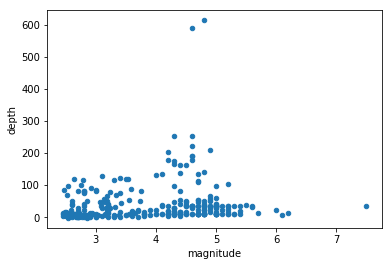

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   depth  magnitude
0  23.62       2.58
1  21.08       3.90
2  10.00       4.80
3  10.00       4.70
4  10.00       5.00


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': '401', 'short_name': '401', 'types': ['street_number']}, {'long_name': 'Hilltop Avenue', 'short_name': 'Hilltop Ave', 'types': ['route']}, {'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']}, {'long_name': '0001', 'short_name': '0001', 'types': ['postal_code_suffix']}], 'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA', 'geometry': {'location': {'lat': 38.0328721, 'lng': -84.5017179}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 38.0342210802915, 'lng': -84.50036891970849}, 'southwest': {'lat

In [17]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [18]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0328721 -84.5017179


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [26]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'Bangladesh Shilpakala Academy'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=Bangladesh+Shilpakala+Academy


In [27]:
response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': 'Segun Bagicha Road', 'short_name': 'Segun Bagicha Rd', 'types': ['route']}, {'long_name': 'Dhaka', 'short_name': 'Dhaka', 'types': ['locality', 'political']}, {'long_name': 'Dhaka District', 'short_name': 'Dhaka District', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Dhaka Division', 'short_name': 'Dhaka Division', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'Bangladesh', 'short_name': 'BD', 'types': ['country', 'political']}], 'formatted_address': 'Address: 14/3 Segunbagicha, Segun Bagicha Rd, Dhaka, Bangladesh', 'geometry': {'location': {'lat': 23.734261, 'lng': 90.40622069999999}, 'location_type': 'GEOMETRIC_CENTER', 'viewport': {'northeast': {'lat': 23.7356099802915, 'lng': 90.40756968029149}, 'southwest': {'lat': 23.7329120197085, 'lng': 90.40487171970848}}}, 'place_id': 'ChIJ9ZEex_O4VTcRgTq-Wom5_og', 'types': ['art_gallery', 'establishment', 'point_of_interest']}], 'status': 'O

In [28]:
pp.pprint(data)

{'results': [{'address_components': [{'long_name': 'Segun Bagicha Road',
                                      'short_name': 'Segun Bagicha Rd',
                                      'types': ['route']},
                                     {'long_name': 'Dhaka',
                                      'short_name': 'Dhaka',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Dhaka District',
                                      'short_name': 'Dhaka District',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Dhaka Division',
                                      'short_name': 'Dhaka Division',
                                      'types': ['administrative_area_level_1',
                                                'political']},
                                     {

In [29]:
for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

23.734261 90.40622069999999


# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [30]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [31]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [35]:
consumer_key

'vJw8lBXmHJRuLLCgaIzJcrrf4'

In [32]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [46]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'realDonaldTrump',
    'count':5,'until':'2017-12-11'
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

WITCH HUNT!
“We’ve seen NO EVIDENCE OF COLLUSION....I have seen nothing, the firing of James Comey and all of the aftermath, th… https://t.co/smYiwXrZnh
“I’ve been skeptical about the collusion and obstruction claims for the last year. I just don’t see the evidence...… https://t.co/wUxgVpVTIN
“He’s got a very good point. Somebody in the Justice Department has a treasure trove of evidence of Mrs. Clinton’s… https://t.co/IpmARu0gyP
RT @WhiteHouse: Merit-based immigration reform will benefit American workers and relieve the strain imposed by our current system on Federa…


In [47]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Feb 25 19:43:34 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 822215673812119553,
                                 'id_str': '822215673812119553',
                                 'indices': [3, 14],
                                 'name': 'The White House',
                                 'screen_name': 'WhiteHouse'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 967847560248426498,
 'id_str': '967847560248426498',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 11940,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Sun Feb 

### Other API endpoints allow different types of searches

In [49]:
# search for public tweets about #bart

endpoint = 'search/tweets'
params = {
    'q': '#bangladesh', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @sajeebwazed: .@NPR: #Bangladesh has managed to cut its #newborn mortality rate from 64.2 deaths per 1,000 live births in 1990 to 20.1 p…

RT @BobGodec: Asanteni to the amazing people in #Bangladesh #Mombasa &amp; @hope2shine for a wonderful visit! You are an inspiration &amp; making a…

.@NPR: #Bangladesh has managed to cut its #newborn mortality rate from 64.2 deaths per 1,000 live births in 1990 to… https://t.co/A0JrvCRKpU

.@NPR: #Bangladesh has managed to cut its #newborn mortality rate from 64.2 deaths per 1,000 live births in 1990 to… https://t.co/SxFFLlgZR3



In [53]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'en', 
    'count': 6
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Training with my L-Drago Destroy right now.

@thatemskid @thatemsnerd bring it home

RT @Zola1611: “I REALLY BELIEVE 
I’D RUN IN THERE...”

...ya damn right you would. You’ve done it before. 

@realDonaldTrump @RealJamesWood…

RT @Jada_Armani: @BiggBrazy4 Mane i swear!!! 😭 You was so drunk this day 😂😂😂😂😂

Better off minding ya business https://t.co/rmryAtL1IU

RT @CornwallLive: A man has died after a crash on the #A38 https://t.co/GQFArY74jg



In [54]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

New Blog Post Why are You Inflexible?  https://t.co/zG4DQ8ETsK

Yay Monday’s 😭 https://t.co/RRC48Yid9I

No reason to dread Mondays When Pilates is an option! Start your day and week feeling long,… https://t.co/s3qe9u0w25

Just a few days left for our February Special!! Three privates for just… https://t.co/4wuMHix6pQ

It may be rainy 🌨 outside… But it’s nice and shiny in the studio. Getting ready for a couple… https://t.co/pHspmEq0ze



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [ ]:
endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

### Bonus: Streaming live tweets in real time 

In [ ]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
